Tiasa Malitya

*   
  Student No: 24005709
*   Github: https://github.com/Tiasa24/ML_tutorial25_5709




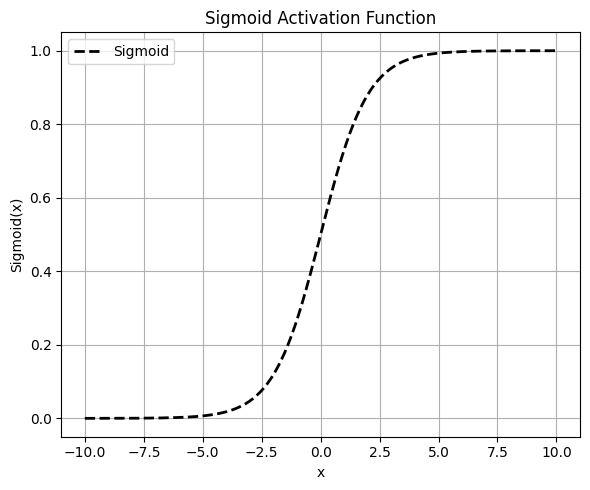

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate values for x
x = np.linspace(-10, 10, 400)

# Plot Sigmoid function
plt.figure(figsize=(6,5))
plt.plot(x, sigmoid(x), label='Sigmoid', linestyle="--", color ="black", linewidth=2)
plt.title('Sigmoid Activation Function')
plt.xlabel('x')
plt.ylabel('Sigmoid(x)')
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()
plt.savefig("sigmoid.jpg", dpi = 300)
plt.show()


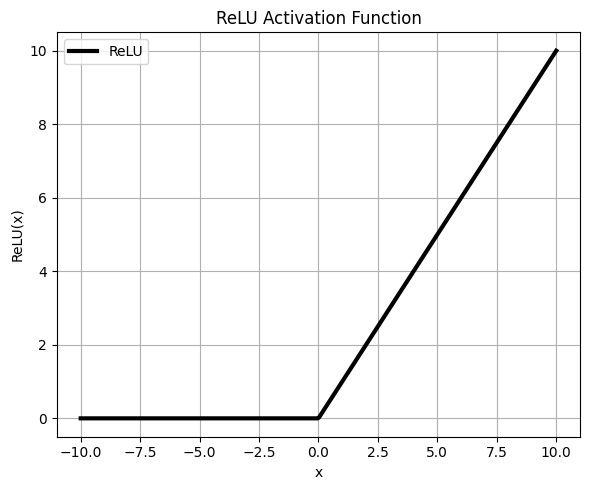

In [19]:
# Define the ReLU function
def relu(x):
    return np.maximum(0, x)

# Generate values for x
x = np.linspace(-10, 10, 400)

# Plot ReLU function
plt.figure(figsize=(6, 5))
plt.plot(x, relu(x), label='ReLU', linestyle = "solid", linewidth=3, color = "black")
plt.title('ReLU Activation Function')
plt.xlabel('x')
plt.ylabel('ReLU(x)')
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()
plt.savefig("ReLU.jpg", dpi = 300)
plt.show()

In this tutorial, we will be working with the CIFAR-10 dataset, a widely used benchmark dataset for image classification tasks. It consists of 60,000 color images, each of size 32×32 pixels, divided into 10 different categories:

* Airplane
* Automobile
* Bird
* Cat
* Deer
* Dog
* Frog
* Horse
* Ship
* Truck

The dataset is pre-divided into:

50,000 images for training &
10,000 images for testing

Each image has three color channels (RGB), making it ideal for convolutional neural networks (CNNs).

Before training our model, we will:  
* Normalize the pixel values to be between 0 and 1.
* Convert the labels to categorical format using One-Hot Encoding to make them  suitable for classification.
* Visualize some sample images to understand the dataset better.





In [31]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import random

# Set random seeds for reproducibility
random.seed(42)
tf.random.set_seed(42)

# Load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize pixel values (0 to 1 range)
X_train, X_test = X_train / 255.0, X_test / 255.0

# Convert labels to categorical format
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


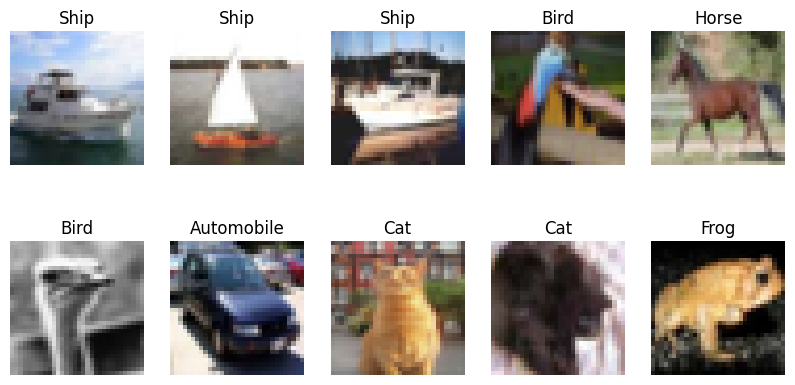

In [32]:
import numpy as np

# reproducibility
np.random.seed(42)
# Define class names
class_names = ["Airplane", "Automobile", "Bird", "Cat", "Deer",
               "Dog", "Frog", "Horse", "Ship", "Truck"]

# Plot 10 random images from the training set
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)  # Create a 2-row, 5-column grid
    random_index = np.random.randint(0, len(X_train))  # Pick a random image
    plt.imshow(X_train[random_index])  # Display the image
    plt.title(class_names[y_train[random_index].argmax()])  # Get class label
    plt.axis("off")  # Hide axes
plt.savefig("cifar.jpg", dpi = 300)
plt.show()


In [22]:
def build_sigmoid_model():
    model = Sequential([
        Conv2D(32, (3,3), activation='sigmoid', input_shape=(32,32,3)),
        MaxPooling2D((2,2)),
        Flatten(),
        Dense(128, activation='sigmoid'),
        Dense(10, activation='softmax')  # Output layer (Softmax for classification)
    ])
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

sigmoid_model = build_sigmoid_model()
sigmoid = sigmoid_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 65s 81ms/step - accuracy: 0.0978 - loss: 2.3704 - val_accuracy: 0.1000 - val_loss: 2.3047
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 82ms/step - accuracy: 0.0975 - loss: 2.3078 - val_accuracy: 0.1000 - val_loss: 2.3047
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 79ms/step - accuracy: 0.0975 - loss: 2.3076 - val_accuracy: 0.1000 - val_loss: 2.3046
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 79ms/step - accuracy: 0.0978 - loss: 2.3084 - val_accuracy: 0.1000 - val_loss: 2.3048
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 76ms/step - accuracy: 0.1525 - loss: 2.2163 - val_accuracy: 0.3340 - val_loss: 1.8647
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 58s 74ms/step - accuracy: 0.3474 - loss: 1.8217 - val_accuracy: 0.3870 - val_loss: 1.7188
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 75ms/step - accuracy: 0.3912 - loss: 1.6958 - val_accuracy: 0.4176 - val_loss: 1.6349
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 86s 80ms/step - accuracy: 0.4224 - loss: 1.6073 - 

In [34]:
def build_relu_model():
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
        MaxPooling2D((2,2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')  # Output layer
    ])
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

relu_model = build_relu_model()
relu = relu_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 62s 77ms/step - accuracy: 0.4028 - loss: 1.6674 - val_accuracy: 0.5607 - val_loss: 1.2465
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 76ms/step - accuracy: 0.5764 - loss: 1.2088 - val_accuracy: 0.5929 - val_loss: 1.1571
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 60s 76ms/step - accuracy: 0.6241 - loss: 1.0794 - val_accuracy: 0.6002 - val_loss: 1.1287
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 90s 86ms/step - accuracy: 0.6571 - loss: 0.9864 - val_accuracy: 0.6132 - val_loss: 1.1078
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 61s 78ms/step - accuracy: 0.6852 - loss: 0.9103 - val_accuracy: 0.6254 - val_loss: 1.0809
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 60s 76ms/step - accuracy: 0.7079 - loss: 0.8441 - val_accuracy: 0.6365 - val_loss: 1.0661
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 75ms/step - accuracy: 0.7295 - loss: 0.7835 - val_accuracy: 0.6348 - val_loss: 1.0900
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 59s 76ms/step - accuracy: 0.7494 - loss: 0.7271 - 

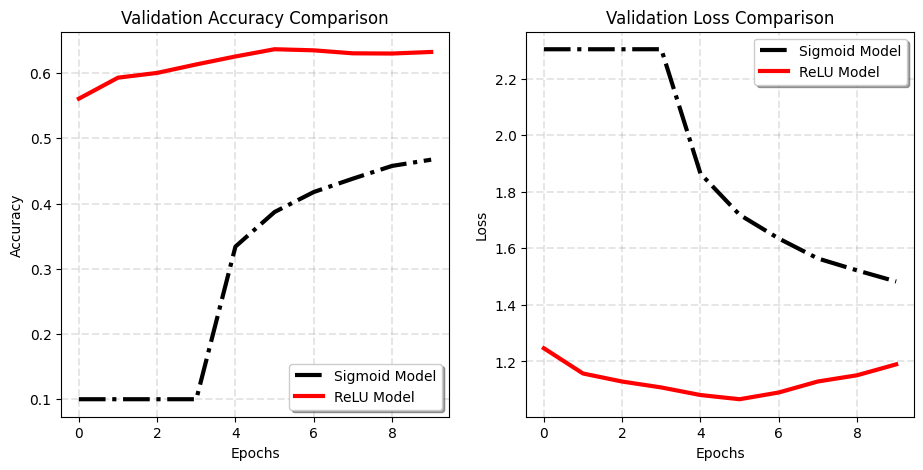

In [35]:
def plot_performance(sigmoid, relu):
    plt.figure(figsize=(11, 5))

    # Accuracy comparison
    plt.subplot(1, 2, 1)
    plt.plot(sigmoid.history['val_accuracy'], label="Sigmoid Model", color='black', linestyle ="-.", linewidth=3)
    plt.plot(relu.history['val_accuracy'], label="ReLU Model", color='red', linestyle ="solid", linewidth=3)
    plt.title("Validation Accuracy Comparison")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend(shadow=True)
    plt.grid(True, color = "grey", linewidth = "1.4", linestyle = "--", alpha =0.2)

    # Loss comparison
    plt.subplot(1, 2, 2)
    plt.plot(sigmoid.history['val_loss'], label="Sigmoid Model", color='black', linestyle ="-.", linewidth=3)
    plt.plot(relu.history['val_loss'], label="ReLU Model", color='red', linestyle ="solid", linewidth=3)
    plt.title("Validation Loss Comparison")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend(shadow=True)
    plt.grid(True, color = "grey", linewidth = "1.4", linestyle = "--", alpha =0.2)

    plt.savefig("comparison.jpg", dpi=200)

plot_performance(sigmoid, relu)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


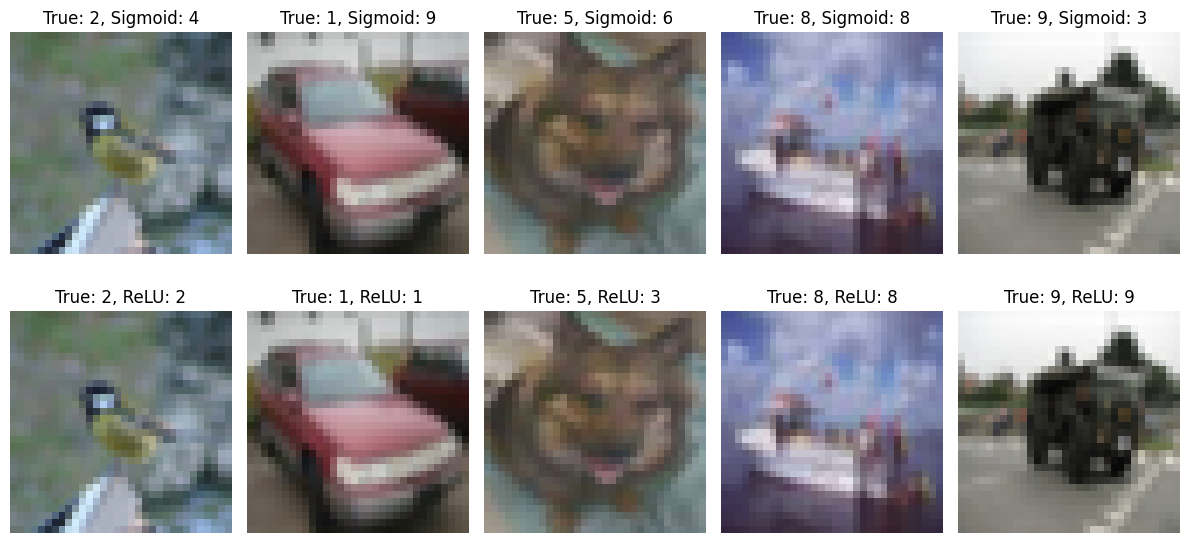

In [36]:
np.random.seed(42)
# Predict on the test set for both models
y_pred_sigmoid = sigmoid_model.predict(X_test)
y_pred_sigmoid = np.argmax(y_pred_sigmoid, axis=1)  # Convert one-hot to class labels

y_pred_relu = relu_model.predict(X_test)
y_pred_relu = np.argmax(y_pred_relu, axis=1)  # Convert one-hot to class labels

# Select the indices of random test images
indices = np.random.choice(range(len(X_test)), size=5, replace=False)

# Plot the images with true labels and predicted labels
fig, axes = plt.subplots(2, 5, figsize=(12, 6))

for i, index in enumerate(indices):
    # True label
    true_label = np.argmax(y_test[index])  # Convert y_test to class label

    # Sigmoid model prediction
    sigmoid_pred = y_pred_sigmoid[index]

    # ReLU model prediction
    relu_pred = y_pred_relu[index]

    # Display images and results
    axes[0, i].imshow(X_test[index])  # Display the image
    axes[0, i].set_title(f"True: {true_label}, Sigmoid: {sigmoid_pred}")  # Sigmoid prediction
    axes[0, i].axis('off')

    axes[1, i].imshow(X_test[index])  # Display the same image
    axes[1, i].set_title(f"True: {true_label}, ReLU: {relu_pred}")  # ReLU prediction
    axes[1, i].axis('off')

plt.tight_layout()
plt.savefig("output.jpg", dpi = 300)
plt.show()
